# Importing libraries for the Project

In [1]:

import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


import os
#print(os.listdir("../input"))

# Dataset Creation

In [2]:
!pip install Faker 


In [3]:
from faker import Faker

In [4]:
fake_data = Faker()

In [5]:
# Let's create a list of 400000 fake names first
def create_names(n):
   name = []
   for _ in range(0, n):
        name.append(fake_data.name())
   return name

In [6]:
name = create_names(400000)

In [7]:
# Check the first 10 results
name[:10]

['Michael Ponce',
 'Matthew Thomas',
 'John Craig',
 'Elizabeth Kemp',
 'Cheryl Johnston',
 'Amanda Ward',
 'Sarah Lopez',
 'Christopher Wilson',
 'Rachel Martinez',
 'Gabriel Gill']

In [8]:
# Create a list of age from 21 to 98 (integers)
age = np.random.randint(21, 99, size = 400000, dtype = 'int')

In [9]:
# gender
# Create a list of values 0 and 1, where 1 = male
gender = np.random.randint(0,2, size = 400000)

In [10]:
# Create a list of randomly picked races from the list of 4 races
def create_race(n):
    race = []
    for _ in range(0, n):
        race.append(fake_data.random_element(elements = ("White", "Hispanic", "Black", "Asian")))
    return race

In [11]:
races = create_race(400000)

In [12]:
#Create a list of randomly picked side effects from the list of 4 types of side effect
def create_sideeffect(n):
    sideeffect = []
    for _ in range(0, n):
        sideeffect.append(np.random.choice(['no','mild','sever','extremely severe'] ,p=[0.4,0.3,0.2,0.1]))
    return sideeffect


In [13]:
side_effect=create_sideeffect(400000)

In [14]:
# Now, connect all columns into one data set
data = pd.DataFrame(list(zip(name, age, gender,races, side_effect)),columns = ['Name', 'Age', 'Gender', 'Race', 'Side_effect'])

In [15]:
data.head(10)

,Name,Age,Gender,Race,Side_effect
0,Michael Ponce,28,0,Black,mild
1,Matthew Thomas,63,0,Hispanic,mild
2,John Craig,60,1,Hispanic,sever
3,Elizabeth Kemp,48,0,Hispanic,mild
4,Cheryl Johnston,55,0,Black,sever
5,Amanda Ward,73,1,Asian,mild
6,Sarah Lopez,46,1,Black,sever
7,Christopher Wilson,85,1,Asian,no
8,Rachel Martinez,33,0,Black,sever
9,Gabriel Gill,59,1,White,mild


In [16]:
# Add an additional column named effectiveness to map the relation of target with dependent variable, so that we get good accuracy.

In [17]:
data['Effectivness']= data['Side_effect']

In [18]:
data.head()

,Name,Age,Gender,Race,Side_effect,Effectivness
0,Michael Ponce,28,0,Black,mild,mild
1,Matthew Thomas,63,0,Hispanic,mild,mild
2,John Craig,60,1,Hispanic,sever,sever
3,Elizabeth Kemp,48,0,Hispanic,mild,mild
4,Cheryl Johnston,55,0,Black,sever,sever


In [19]:
data.Effectivness.replace({'no':8,'mild':6,'sever':4,'extremely severe':1},inplace=True)

In [20]:
data.head()

,Name,Age,Gender,Race,Side_effect,Effectivness
0,Michael Ponce,28,0,Black,mild,6
1,Matthew Thomas,63,0,Hispanic,mild,6
2,John Craig,60,1,Hispanic,sever,4
3,Elizabeth Kemp,48,0,Hispanic,mild,6
4,Cheryl Johnston,55,0,Black,sever,4


In [21]:
# Save the created Dataset as  drug1.csv in the folder

In [22]:
#data.to_csv('drug1.csv')

In [23]:
# The mapping of efectiveness and target is perfect so we get an accuracy 1, so inorder to avoid that we include some annomalies in the effectivness column mannually

In [24]:
pwd

'C:\\Users\\jubyj\\Desktop\\data science'

# Read the Dataset

In [25]:
# Dataset already contains an index column, so to avoid repetion in the index column ,we select the columns that need to be used by using usecols function

In [26]:
 data = pd.read_excel('C:\\Users\\jubyj\\Desktop\\data science\\drug2.xlsx',usecols=[1,2,3,4,5,6])

In [27]:
data.head()

,Name,Age,Gender,Race,Side_effect,Effectivness
0,Jessica Sherman,33.0,0,Hispanic,mild,6
1,Richard Ford,30.0,1,White,no,9
2,Jacob Martinez,67.0,0,White,mild,5
3,Michael Huynh,72.0,1,White,no,9
4,Mrs. Monica Beltran,64.0,0,White,no,8


In [28]:
data.tail()

,Name,Age,Gender,Race,Side_effect,Effectivness
399995,Heather Carney,47.0,0,Black,mild,6
399996,Ian Nguyen,71.0,0,Black,mild,6
399997,Stacey Miller,44.0,0,Asian,no,9
399998,Christopher Lewis,46.0,1,White,extremely severe,1
399999,Michael Mcbride,39.0,1,Asian,mild,5


# Basic Details of Data Set

In [29]:
data.shape

(400000, 6)

In [30]:
# Our dataset consist of 400000 rows and 6 columns

In [31]:
data.columns

Index(['Name', 'Age', 'Gender', 'Race', 'Side_effect', 'Effectivness'], dtype='object')

In [32]:
# the names of the columns are 'Name', 'Age', 'Gender', 'Race', 'Side_effect', 'Effectivness'

In [33]:
%whos

Variable                     Type         Data/Info
---------------------------------------------------
DecisionTreeClassifier       ABCMeta      <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
Faker                        type         <class 'faker.proxy.Faker'>
GradientBoostingClassifier   ABCMeta      <class 'sklearn.ensemble.<...>dientBoostingClassifier'>
KNeighborsClassifier         ABCMeta      <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LabelEncoder                 type         <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LogisticRegression           type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier       ABCMeta      <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SVC                          ABCMeta      <class 'sklearn.svm._classes.SVC'>
StandardScaler               type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
XGBClassifier                type         <class 'xgboost.sklea

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Name          400000 non-null  object 
 1   Age           399996 non-null  float64
 2   Gender        400000 non-null  int64  
 3   Race          399997 non-null  object 
 4   Side_effect   400000 non-null  object 
 5   Effectivness  400000 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 18.3+ MB


In [35]:
# Dataset consisst of both categorical and numerical data

In [36]:
data.describe()

,Age,Gender,Effectivness
count,399996.000000,400000.000000,400000.000000
mean,59.510808,0.494160,6.094955
std,22.480122,0.499967,2.056953
min,21.000000,0.000000,0.000000
25%,40.000000,0.000000,4.000000
50%,59.000000,0.000000,6.000000
75%,79.000000,1.000000,8.000000
max,98.000000,1.000000,9.000000


In [37]:
# This describes the basic summary statistics of the dataset

In [38]:
data.dtypes

Name             object
Age             float64
Gender            int64
Race             object
Side_effect      object
Effectivness      int64
dtype: object

# Data Preprocessing

# Handling the Missing values

In [39]:
data.isna().sum()

Name            0
Age             4
Gender          0
Race            3
Side_effect     0
Effectivness    0
dtype: int64

In [40]:
# Our dataset  contain any null values in the  age and race column

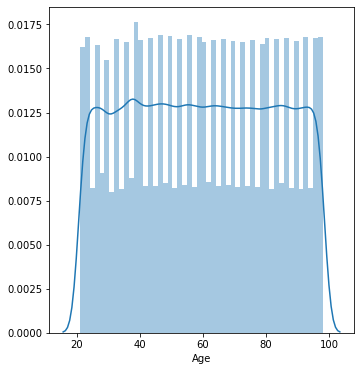

In [41]:
#Age
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.distplot(data['Age'])


plt.show()


In [42]:
# since the age is normally distributed we can use the mean for filling

In [43]:
data['Age'].mean

<bound method Series.mean of 0         33.0
1         30.0
2         67.0
3         72.0
4         64.0
          ... 
399995    47.0
399996    71.0
399997    44.0
399998    46.0
399999    39.0
Name: Age, Length: 400000, dtype: float64>

In [44]:
data['Age'].median

<bound method Series.median of 0         33.0
1         30.0
2         67.0
3         72.0
4         64.0
          ... 
399995    47.0
399996    71.0
399997    44.0
399998    46.0
399999    39.0
Name: Age, Length: 400000, dtype: float64>

In [45]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [46]:
# Age column is filled with mean since it is normally distributed

Black       100228
Asian       100102
White        99992
Hispanic     99675
Name: Race, dtype: int64


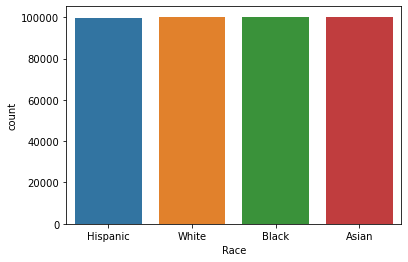

In [47]:
print(data['Race'].value_counts())
sns.countplot(x='Race',data=data)

In [48]:
# the race consist of people in different races black,hispanic,white and asians. since our feature is categorical we use mode for the missing value handling

In [49]:
data['Race']=data['Race'].fillna('Black')

In [50]:
data.isna().sum()

Name            0
Age             0
Gender          0
Race            0
Side_effect     0
Effectivness    0
dtype: int64

In [51]:
# Thus the null values are removed

# data Corelation

In [52]:
data.corr()

,Age,Gender,Effectivness
Age,1.000000,0.013008,-0.118096
Gender,0.013008,1.000000,-0.010281
Effectivness,-0.118096,-0.010281,1.000000


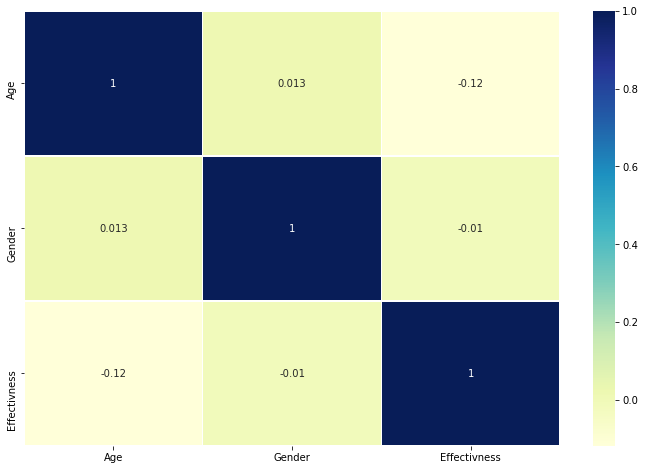

In [53]:
corrmatrix=data.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corrmatrix,annot=True,linewidths=0.4 ,cmap='YlGnBu')

In [54]:
data.groupby('Race').count()

,Name,Age,Gender,Side_effect,Effectivness
Race,,,,,
Asian,100102,100102,100102,100102,100102
Black,100231,100231,100231,100231,100231
Hispanic,99675,99675,99675,99675,99675
White,99992,99992,99992,99992,99992


Black       100231
Asian       100102
White        99992
Hispanic     99675
Name: Race, dtype: int64


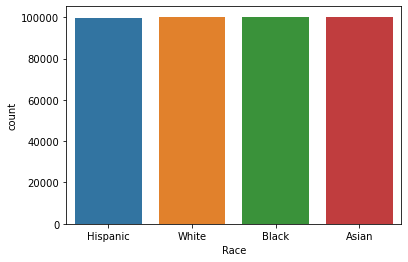

In [55]:
print(data['Race'].value_counts())
sns.countplot(x='Race',data=data)

In [56]:
# Our dataset includes people from 4 races ,Asian,Black,Hispanic and White.
# In our dataset 100102 Asians, 100231 Black, 99675 Hispanic and 99992 White peoples are there.

In [57]:
data.groupby('Side_effect').count()

,Name,Age,Gender,Race,Effectivness
Side_effect,,,,,
no,1,1,1,1,1
extremely severe,27370,27370,27370,27370,27370
mild,156938,156938,156938,156938,156938
no,128202,128202,128202,128202,128202
sever,87489,87489,87489,87489,87489


In [58]:
# Shows count of people with different side effects

# Univariate Analysis

In [59]:
# count plot of target variable

mild                156938
no                  128202
sever                87489
extremely severe     27370
 no                      1
Name: Side_effect, dtype: int64


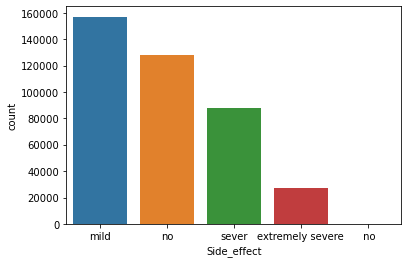

In [60]:
print(data['Side_effect'].value_counts())
sns.countplot(x='Side_effect',data=data)

In [61]:
# Target variable of our dataset is Sideeffect. This is a multi class feature
# it consist of severe,mild, no and extrmely severe category.

In [62]:
# our dataset consist of ' no' value, which is actually a mistake so we decided to delete that perticular column

In [63]:
data['Side_effect'].nunique()

5

In [64]:

data.loc[data['Side_effect']==' no'].index

Int64Index([7906], dtype='int64')

In [65]:
data.drop([7906],inplace=True)

In [66]:
#data['7906']=data['7906'].fillna('no')

mild                156938
no                  128202
sever                87489
extremely severe     27370
Name: Side_effect, dtype: int64


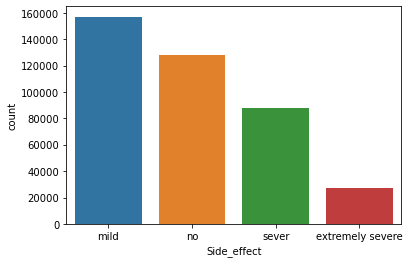

In [67]:
print(data['Side_effect'].value_counts())
sns.countplot(x='Side_effect',data=data)

In [68]:
data['Name'].nunique()

192210

In [69]:
# name does not contributes anything to the effect of drug, so this colum should be removed

In [70]:
# frequency distribution of numerical features

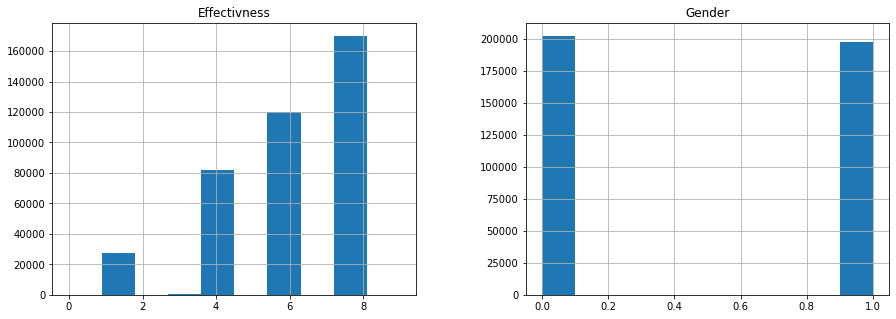

In [71]:
freqgraph=data.select_dtypes(include=['int64'])
freqgraph.hist(figsize=(15,5))
plt.show()

In [72]:
# count plot of different gender

0    202335
1    197664
Name: Gender, dtype: int64


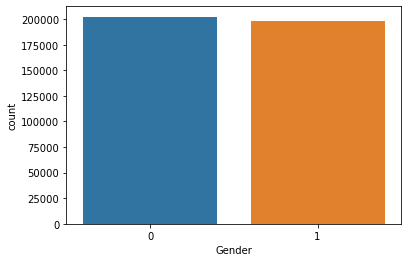

In [73]:
print(data['Gender'].value_counts())
sns.countplot(x='Gender',data=data)

In [74]:
# our dataset consist of both male and female patients

In [75]:
# Distribution of Age

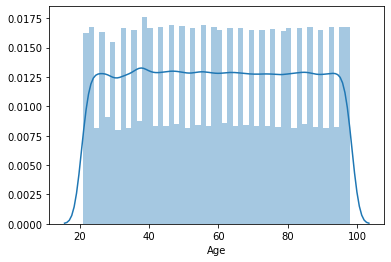

In [76]:
sns.distplot(data['Age'])

In [77]:
# Age value is normally distributed in our dataset

In [78]:
# this univariate  analysis give some idea of data distribution in the trial dataset

In [79]:
data.columns

Index(['Name', 'Age', 'Gender', 'Race', 'Side_effect', 'Effectivness'], dtype='object')

# checking for the outliers

In [80]:
data.columns

Index(['Name', 'Age', 'Gender', 'Race', 'Side_effect', 'Effectivness'], dtype='object')

Text(0.5, 1.0, 'Box plot of Age')

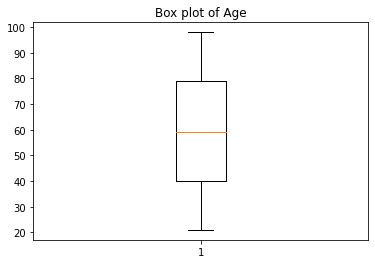

In [81]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [82]:
# The age feature doesnot shows any outliers

Text(0.5, 1.0, 'Box plot of Gender')

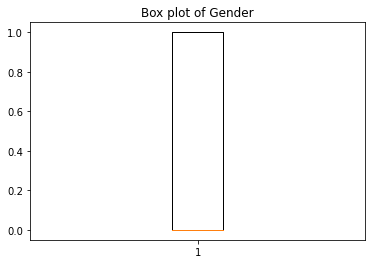

In [83]:
plt.boxplot(data['Gender'])
plt.title('Box plot of Gender')

Text(0.5, 1.0, 'Box plot of Effectivness')

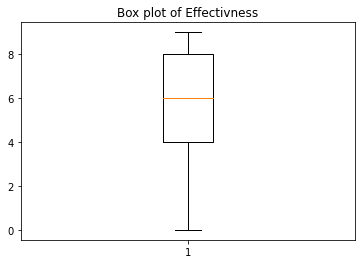

In [84]:
plt.boxplot(data['Effectivness'])
plt.title('Box plot of Effectivness')

In [85]:
# our dataset consist of no outiers

# Bivariate Analysis

In [86]:
# Age Vs Side Effect

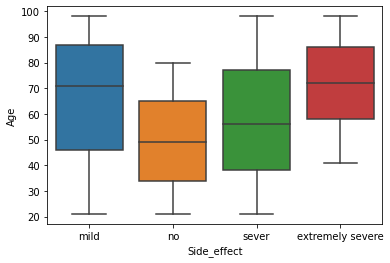

In [87]:
sns.boxplot(x='Side_effect', y='Age', data=data)

In [88]:
# Our dataset consisst of 4 side effects mild no sever and extremely severe
# Patients above 55 age are more prone to extremely severe side effects
# younger generation that is the people with age 30 to 60 are mostly free from the side effects


In [89]:
# Side Effect vs gender

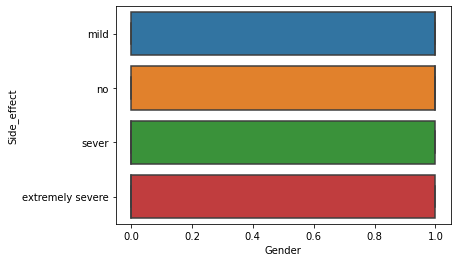

In [90]:
sns.boxplot(x='Gender', y='Side_effect', data=data)

In [91]:
# side effects does not affect any perticular gender.

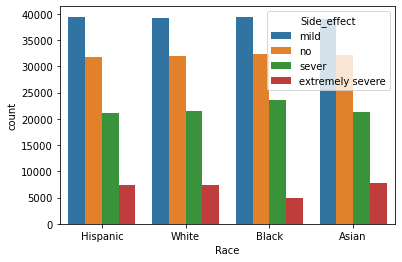

In [92]:
sns.countplot('Race', hue='Side_effect', data=data)

In [93]:
# for black race the extremely severe conditions are small compared to other races

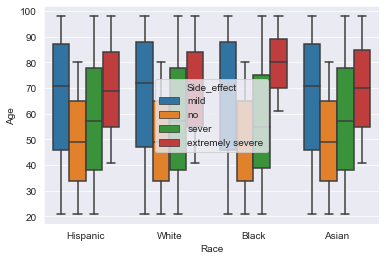

In [94]:
sns.set_style('darkgrid')
sns.boxplot(x='Race', y='Age', data=data, hue='Side_effect')

In [95]:
# for thr black race extreme severe conditions occur only for the patients above 70
#For Hispanic ,white and Asians the extrmely effected age is above 55
# for all the races age up to 45 are not affected by any side effects.
# mild side effects are very common among the age group 45 to 85
#severe conditions are common above 50

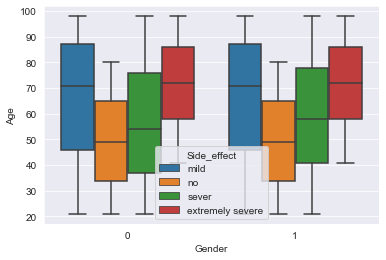

In [96]:
sns.boxplot(x='Gender', y='Age', data=data, hue='Side_effect')

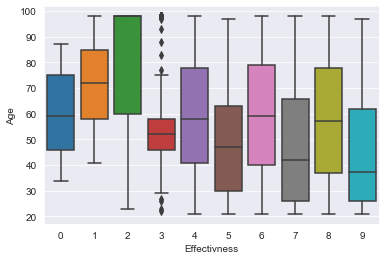

In [97]:
sns.set_style('darkgrid')
sns.boxplot(x='Effectivness', y='Age', data=data,)

# ONE hot Encoding

In [98]:
one_hot=pd.get_dummies(data['Race'],drop_first=True)

In [99]:
data = data.drop('Race',axis = 1)
# Join the encoded df
data = data.join(one_hot)
data

,Name,Age,Gender,Side_effect,Effectivness,Black,Hispanic,White
0,Jessica Sherman,33.0,0,mild,6,0,1,0
1,Richard Ford,30.0,1,no,9,0,0,1
2,Jacob Martinez,67.0,0,mild,5,0,0,1
3,Michael Huynh,72.0,1,no,9,0,0,1
4,Mrs. Monica Beltran,64.0,0,no,8,0,0,1
...,...,...,...,...,...,...,...,...
399995,Heather Carney,47.0,0,mild,6,1,0,0
399996,Ian Nguyen,71.0,0,mild,6,1,0,0
399997,Stacey Miller,44.0,0,no,9,0,0,0
399998,Christopher Lewis,46.0,1,extremely severe,1,0,0,1


In [100]:
data.corr()

,Age,Gender,Effectivness,Black,Hispanic,White
Age,1.000000,0.013005,-0.118094,-0.000326,-0.001990,0.003244
Gender,0.013005,1.000000,-0.010279,-0.001619,0.001867,-0.001163
Effectivness,-0.118094,-0.010279,1.000000,0.018438,-0.004426,-0.006776
Black,-0.000326,-0.001619,0.018438,1.000000,-0.333124,-0.333828
Hispanic,-0.001990,0.001867,-0.004426,-0.333124,1.000000,-0.332592
White,0.003244,-0.001163,-0.006776,-0.333828,-0.332592,1.000000


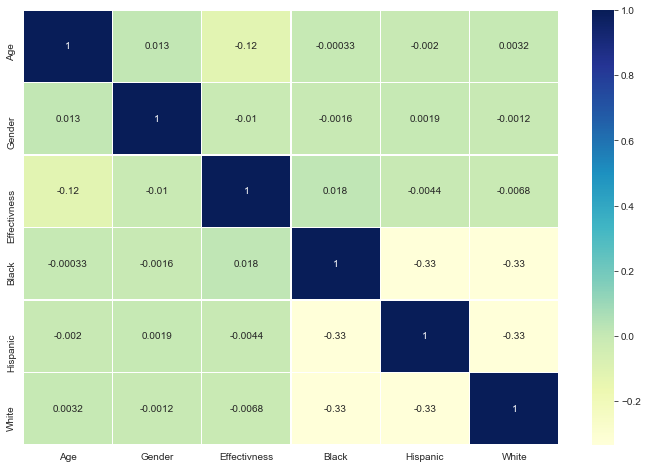

In [101]:
corrmatrix=data.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corrmatrix,annot=True,linewidths=0.4 ,cmap='YlGnBu')

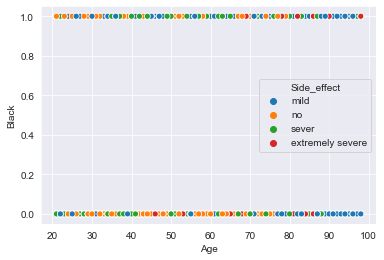

In [102]:
sns.scatterplot(x='Age', y='Black', data=data, hue='Side_effect')

# Splitting Data into dependent and independent variables

In [103]:
y=data['Side_effect']
x=data.drop(['Name','Side_effect'], axis =1)

In [104]:
x.shape

(399999, 6)

In [105]:
y.shape

(399999,)

# splitting the data in to train and test set

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=27,test_size=0.3)

In [107]:
x_train.shape

(279999, 6)

In [108]:
x_test.shape

(120000, 6)

In [109]:
y_train.shape

(279999,)

In [110]:
y_test.shape

(120000,)

# Standard Scaling

In [111]:
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)

# Classification Model

# Logistic Regression

In [112]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
print("Accuracy of Logistic Regression model is ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression model is  0.973125
                  precision    recall  f1-score   support

extremely severe       1.00      1.00      1.00      8122
            mild       0.97      0.99      0.98     47086
              no       0.95      0.97      0.96     38532
           sever       1.00      0.94      0.97     26260

        accuracy                           0.97    120000
       macro avg       0.98      0.97      0.98    120000
    weighted avg       0.97      0.97      0.97    120000



# Random Forest Classifier

In [114]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [115]:
print("Accuracy of Random Forest Classifier  is ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of Random Forest Classifier  is  0.986775
                  precision    recall  f1-score   support

extremely severe       1.00      1.00      1.00      8122
            mild       1.00      1.00      1.00     47086
              no       0.97      0.99      0.98     38532
           sever       0.99      0.95      0.97     26260

        accuracy                           0.99    120000
       macro avg       0.99      0.99      0.99    120000
    weighted avg       0.99      0.99      0.99    120000



In [116]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[ 8118     2     0     2]
 [    1 47078     2     5]
 [    0    10 38283   239]
 [    1     3  1322 24934]]


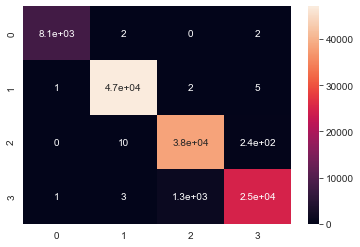

In [117]:
sns.heatmap(cm,annot=True)

# Decision Tree Classifier

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtmodel=DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
y_pred=dtmodel.predict(x_test)

In [119]:
accuracy_score(y_test,y_pred)

0.9867083333333333

In [120]:
print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

extremely severe       1.00      1.00      1.00      8122
            mild       1.00      1.00      1.00     47086
              no       0.97      0.99      0.98     38532
           sever       0.99      0.95      0.97     26260

        accuracy                           0.99    120000
       macro avg       0.99      0.99      0.99    120000
    weighted avg       0.99      0.99      0.99    120000



# Gradient Boosting Classifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [122]:
print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

extremely severe       1.00      1.00      1.00      8122
            mild       1.00      1.00      1.00     47086
              no       0.97      0.99      0.98     38532
           sever       0.99      0.95      0.97     26260

        accuracy                           0.99    120000
       macro avg       0.99      0.99      0.99    120000
    weighted avg       0.99      0.99      0.99    120000



In [123]:
accuracy_score(y_test,y_pred)

0.9867833333333333

# Naive Bayes Classifier

In [124]:
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(x_train,y_train)
y_pred=nbc.predict(x_test)

In [125]:
print("Accuracy of Naive Bayes model is ", accuracy_score(y_test, y_pred))

Accuracy of Naive Bayes model is  0.89445


In [126]:
print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

extremely severe       1.00      1.00      1.00      8122
            mild       1.00      0.77      0.87     47086
              no       0.75      1.00      0.86     38532
           sever       1.00      0.94      0.97     26260

        accuracy                           0.89    120000
       macro avg       0.94      0.93      0.92    120000
    weighted avg       0.92      0.89      0.90    120000



# Random Forest Classifier

In [127]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [128]:
print("Accuracy of Random Forest Classifier  is ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of Random Forest Classifier  is  0.9867666666666667
                  precision    recall  f1-score   support

extremely severe       1.00      1.00      1.00      8122
            mild       1.00      1.00      1.00     47086
              no       0.97      0.99      0.98     38532
           sever       0.99      0.95      0.97     26260

        accuracy                           0.99    120000
       macro avg       0.99      0.99      0.99    120000
    weighted avg       0.99      0.99      0.99    120000



In [129]:
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[ 8118     2     0     2]
 [    1 47077     2     6]
 [    0    10 38283   239]
 [    1     3  1322 24934]]


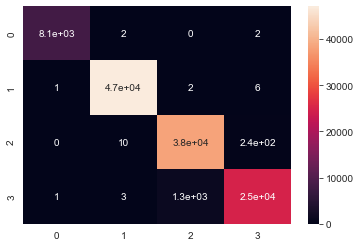

In [130]:
sns.heatmap(cm,annot=True)

Gradientboosting    98.641667
RandomForest        98.623333
DecisionTree        98.617500
logisticReg         97.211667
NaiveBayes          89.452500
dtype: float64


Text(0, 0.5, 'Accuracy')

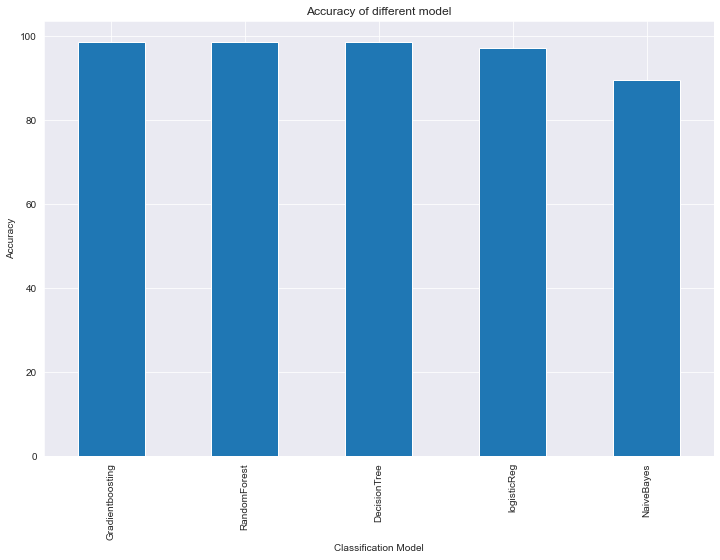

In [131]:
# Accuracy of diff models
accuracy={'logisticReg':0.9721166666666666*100,'DecisionTree':0.986175*100,'Gradientboosting':0.9864166666666667*100,'NaiveBayes':0.894525*100,'RandomForest':0.9862333333333333*100}
acc=pd.Series(accuracy)
print(acc.sort_values(ascending=False))
plt.figure(figsize=(12,8))
plt.title('Accuracy of different model')
acc.sort_values(ascending=False).plot.bar()
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')

# feature importance

In [132]:
# feature impotance
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

Effectivness    85.211440
Age             14.501075
Gender           0.209325
Black            0.064413
White            0.007000
Hispanic         0.006746
dtype: float64

# Hyperparameter Tuning

In [133]:
rf=RandomForestClassifier(max_depth=250, min_samples_leaf= 2, min_samples_split= 2 , n_estimators=500, random_state = 66)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Accuracy of Random Forest model is ", accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

Accuracy of Random Forest model is  0.9866666666666667
                  precision    recall  f1-score   support

extremely severe       1.00      1.00      1.00      8122
            mild       1.00      1.00      1.00     47086
              no       0.96      1.00      0.98     38532
           sever       1.00      0.94      0.97     26260

        accuracy                           0.99    120000
       macro avg       0.99      0.99      0.99    120000
    weighted avg       0.99      0.99      0.99    120000



In [134]:
# Hyper parameter tuning of Random Forest Classifier

In [135]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion =['gini','entropy']


In [136]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
print(param_grid)

{'n_estimators': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [137]:
rf_Model = RandomForestClassifier()

In [138]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [139]:
rf_RandomGrid.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  5.2min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 25, 41, 56, 72, 87,
                                                         103, 118, 134, 150]},
                   verbose=2)

In [140]:
rf_RandomGrid.best_params_

{'n_estimators': 134,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'criterion': 'gini',
 'bootstrap': False}

In [141]:
print (f'Train Accuracy - : {rf_RandomGrid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.987
Test Accuracy - : 0.986


In [142]:
claasifier=RandomForestClassifier(n_estimators= 103,min_samples_split= 5,min_samples_leaf= 1,max_features= 'auto',max_depth= 4,criterion= 'gini' ,bootstrap= True)

In [143]:
# Predicting the Test set results
claasifier.fit(x_train,y_train)
y_pred = claasifier.predict(x_test)


In [144]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score

print("Accuracy of Random Forest model is ", accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

accuracy_score(y_test,y_pred)

Accuracy of Random Forest model is  0.9864083333333333
                  precision    recall  f1-score   support

extremely severe       1.00      1.00      1.00      8122
            mild       1.00      1.00      1.00     47086
              no       0.96      1.00      0.98     38532
           sever       1.00      0.94      0.97     26260

        accuracy                           0.99    120000
       macro avg       0.99      0.98      0.99    120000
    weighted avg       0.99      0.99      0.99    120000



0.9864083333333333

In [145]:
# Hyper parameter tuning of XGBoost Classifier

In [146]:
# Number of trees in xgboost
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]

# Maximum number of levels in tree
max_depth = [3,5,7,10]
learning_rate= [0.01, 0.1],
min_child_weight = [1, 3, 5],
subsample = [0.5, 0.7],
colsample_bytree = [0.5, 0.7],
        


In [147]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'objective' :'multi:softmax',
               'subsample': subsample,
               'colsample_bytree': colsample_bytree}
print(param_grid)

{'n_estimators': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150], 'max_depth': [3, 5, 7, 10], 'learning_rate': ([0.01, 0.1],), 'objective': 'multi:softmax', 'subsample': ([0.5, 0.7],), 'colsample_bytree': ([0.5, 0.7],)}


In [148]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [149]:
from sklearn.model_selection import RandomizedSearchCV
gb_RandomGrid = RandomizedSearchCV(estimator = gb, param_distributions = param_grid, cv = 10, verbose=2,)

In [151]:
#gb_RandomGrid.fit(x_train, y_train)

# Evaluating Model Performance - Cross validation

In [152]:
from sklearn.model_selection import cross_val_score
print (cross_val_score(lr,x,y,cv=5,scoring='accuracy').mean())

C:\Users\public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.9342523288416107


C:\Users\public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
print (cross_val_score(claasifier,x,y,cv=5,scoring='accuracy').mean())

0.9864874693433668


In [154]:
print (cross_val_score(dtmodel,x,y,cv=5,scoring='accuracy').mean())

0.9866124691558644


In [155]:
print (cross_val_score(gb,x,y,cv=5,scoring='accuracy').mean())

0.9865624690933636


In [156]:
print (cross_val_score(nbc,x,y,cv=5,scoring='accuracy').mean())

0.893917235590445


RandomForest        98.663747
DecisionTree        98.660997
Gradientboosting    98.656247
logisticReg         93.425233
NaiveBayes          89.391724
dtype: float64


Text(0, 0.5, 'Accuracy')

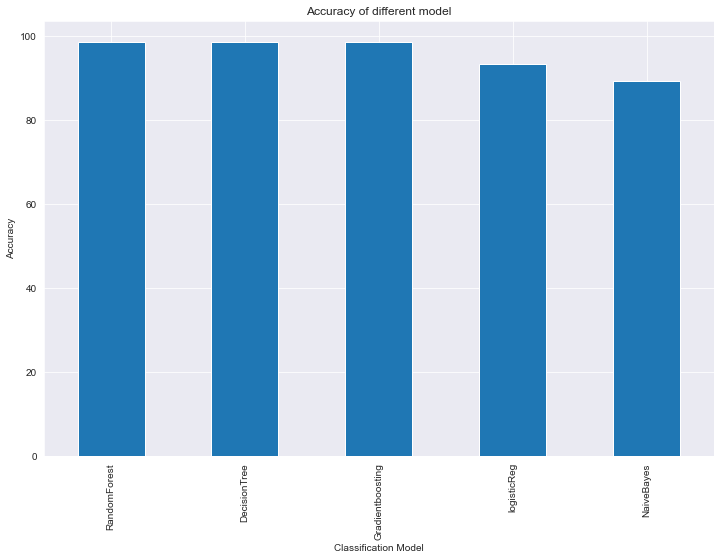

In [157]:
# Accuracy of diff models after cross validation 
accuracy={'logisticReg':0.9342523288416107*100,'DecisionTree':0.9866099691246142*100,'Gradientboosting':0.9865624690933636*100,'NaiveBayes':0.893917235590445*100,'RandomForest':0.986637469124614*100}
acc=pd.Series(accuracy)
print(acc.sort_values(ascending=False))
plt.figure(figsize=(12,8))
plt.title('Accuracy of different model')
acc.sort_values(ascending=False).plot.bar()
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')

In [158]:
# RandomForest Classifier is the best model for out drug data

In [159]:
# Here we considered elavil drug which is an anti depressent drug